In [1]:
using HarmonicBalance

┌ Info: Precompiling HarmonicBalance [e13b9ff6-59c3-11ec-14b1-f3d2cc6c135e]
└ @ Base loading.jl:1423


In [22]:
@variables ω, ω0, F, t, α, γ,β, x(t)
diff_eq = DifferentialEquation(d(x,t,2) + ω0^2*x + β*x^2 + α*x^3 + γ*d(x,t) - F*cos(ω*t), x);
add_harmonic!(diff_eq, x, [0, ω, 2ω]);
harmonic_eq = get_harmonic_equations(diff_eq)

A set of 5 harmonic equations
Variables: a1(T), u1(T), v1(T), u2(T), v2(T)
Parameters: α, ω, β, ω0, γ, F

Harmonic ansatz: 
x(t) = a1(T) + u1(T)*cos(ωt) + v1(T)*sin(ωt) + u2(T)*cos(2ωt) + v2(T)*sin(2ωt)

Harmonic equations:

α*(a1(T)^3) + β*(a1(T)^2) + (ω0^2)*a1(T) + γ*Differential(T)(a1(T)) + (1//2)*β*(u1(T)^2) + (1//2)*β*(u2(T)^2) + (1//2)*β*(v1(T)^2) + (1//2)*β*(v2(T)^2) + (3//4)*α*(u1(T)^2)*u2(T) + (3//2)*α*(u1(T)^2)*a1(T) + (3//2)*α*(u2(T)^2)*a1(T) + (3//2)*α*(v1(T)^2)*a1(T) + (3//2)*α*(v2(T)^2)*a1(T) + (3//2)*α*u1(T)*v1(T)*v2(T) - (3//4)*α*(v1(T)^2)*u2(T) ~ 0.0

(ω0^2)*u1(T) + γ*Differential(T)(u1(T)) + (3//4)*α*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + β*u1(T)*u2(T) + β*v1(T)*v2(T) + (3//2)*α*(u2(T)^2)*u1(T) + (3//4)*α*(v1(T)^2)*u1(T) + (3//2)*α*(v2(T)^2)*u1(T) + (2//1)*β*a1(T)*u1(T) + (3//1)*α*(a1(T)^2)*u1(T) + (3//1)*α*a1(T)*u1(T)*u2(T) + (3//1)*α*a1(T)*v1(T)*v2(T) - F - (ω^2)*u1(T) ~ 0

γ*Differential(T)(v1(T)) + (ω0^2)*v1(T) + (3//4)*α*(v1(T)^3) + β*u1(T)*v2(

In [23]:
#setting up three kinds of solution. First a normal duffing with gamma = 1, second a duffing with a quadratic nonlinearity 
#and third a duffing, but with gamma = gamma - 10/9 beta^2/w0^2
varied = ω => LinRange(1.0, 1.005, 100);
fixed = (α => 1., ω0 => 1, F => 0.0002, γ=>0.002, β => 0);
fixedBeta = (α => 1., ω0 => 1, F => 0.0002, γ=>0.002, β => 0.5);
fixedRenormDuffing = (α => (1.0-10/9*0.5^2), ω0 => 1.0, F => 0.0002, γ=>0.002, β => 0);

In [24]:
#calculate the solutions
solutionsDuffing = get_steady_states(harmonic_eq, varied, fixed, random_warmup=true);
solutionsBeta = get_steady_states(harmonic_eq, varied, fixedBeta, random_warmup=true);
solutionsRenormDuffing = get_steady_states(harmonic_eq, varied, fixedRenormDuffing, random_warmup=true);

Tracking 243 paths... 100%|█████████████████████████████| Time: 0:00:01
  # paths tracked:                  243
  # non-singular solutions (real):  13 (0)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         13 (0)


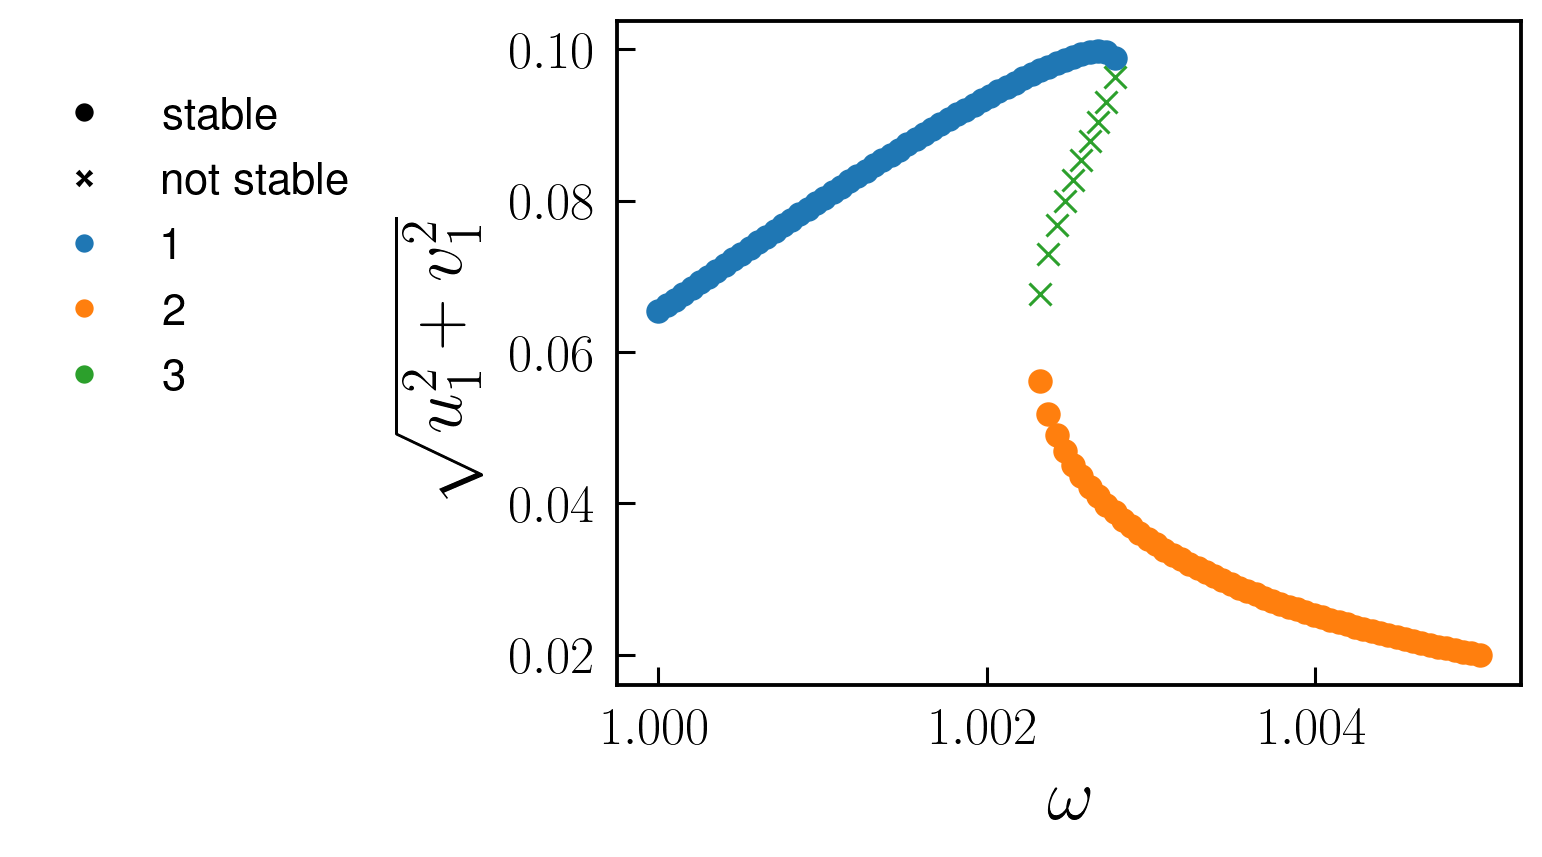

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/hrochan/.julia/packages/PyCall/L0fLP/src/numpy.jl:67
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [25]:
plot_1D_solutions(solutionsRenormDuffing, x="ω", y="sqrt(u1^2 + v1^2)");

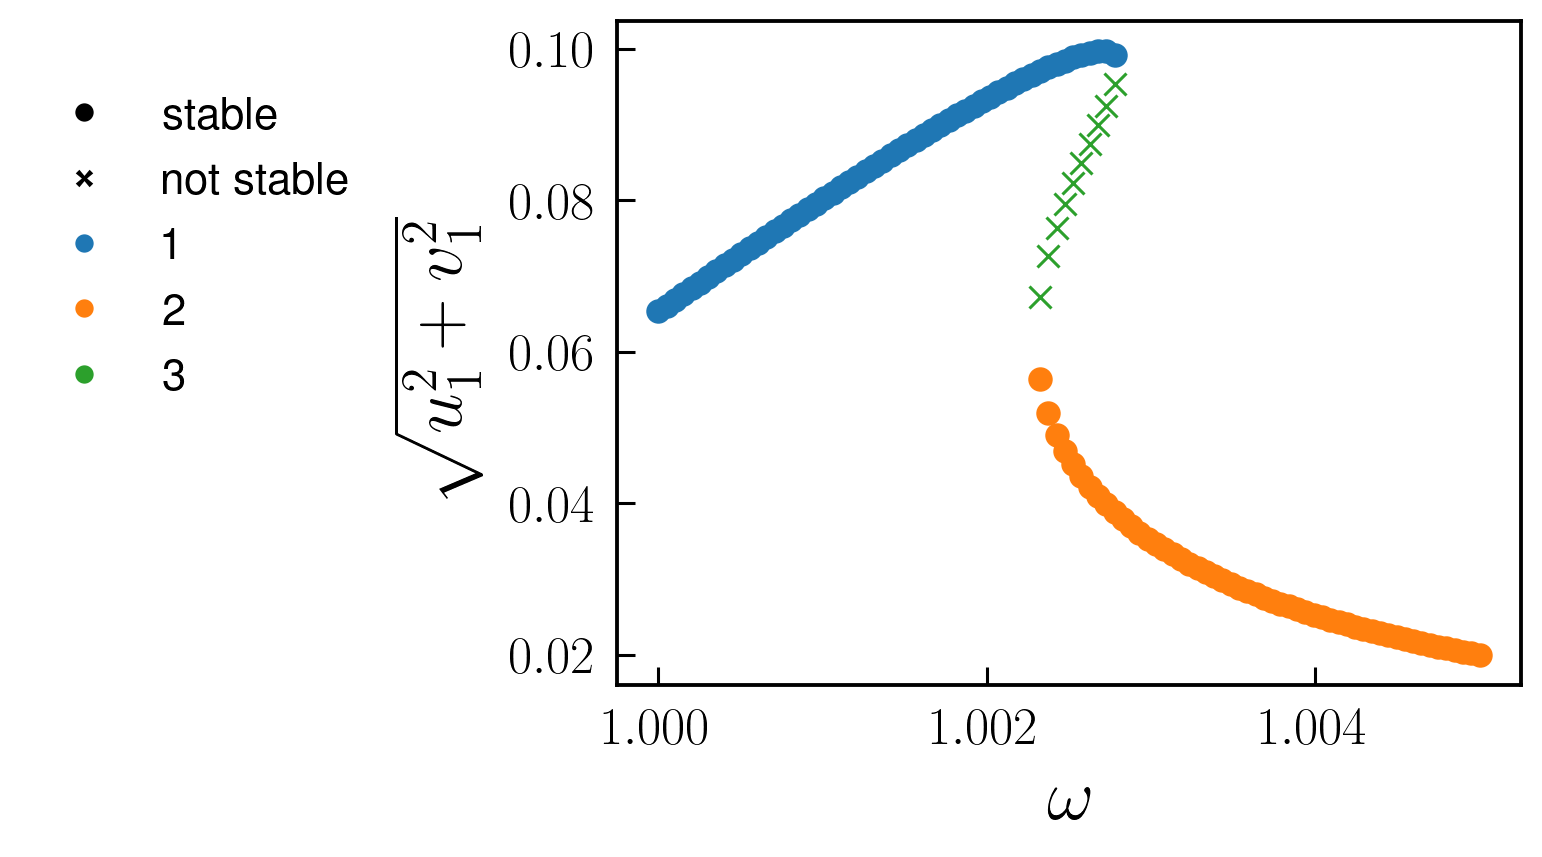

In [26]:
plot_1D_solutions(solutionsBeta, x="ω", y="sqrt(u1^2 + v1^2)");

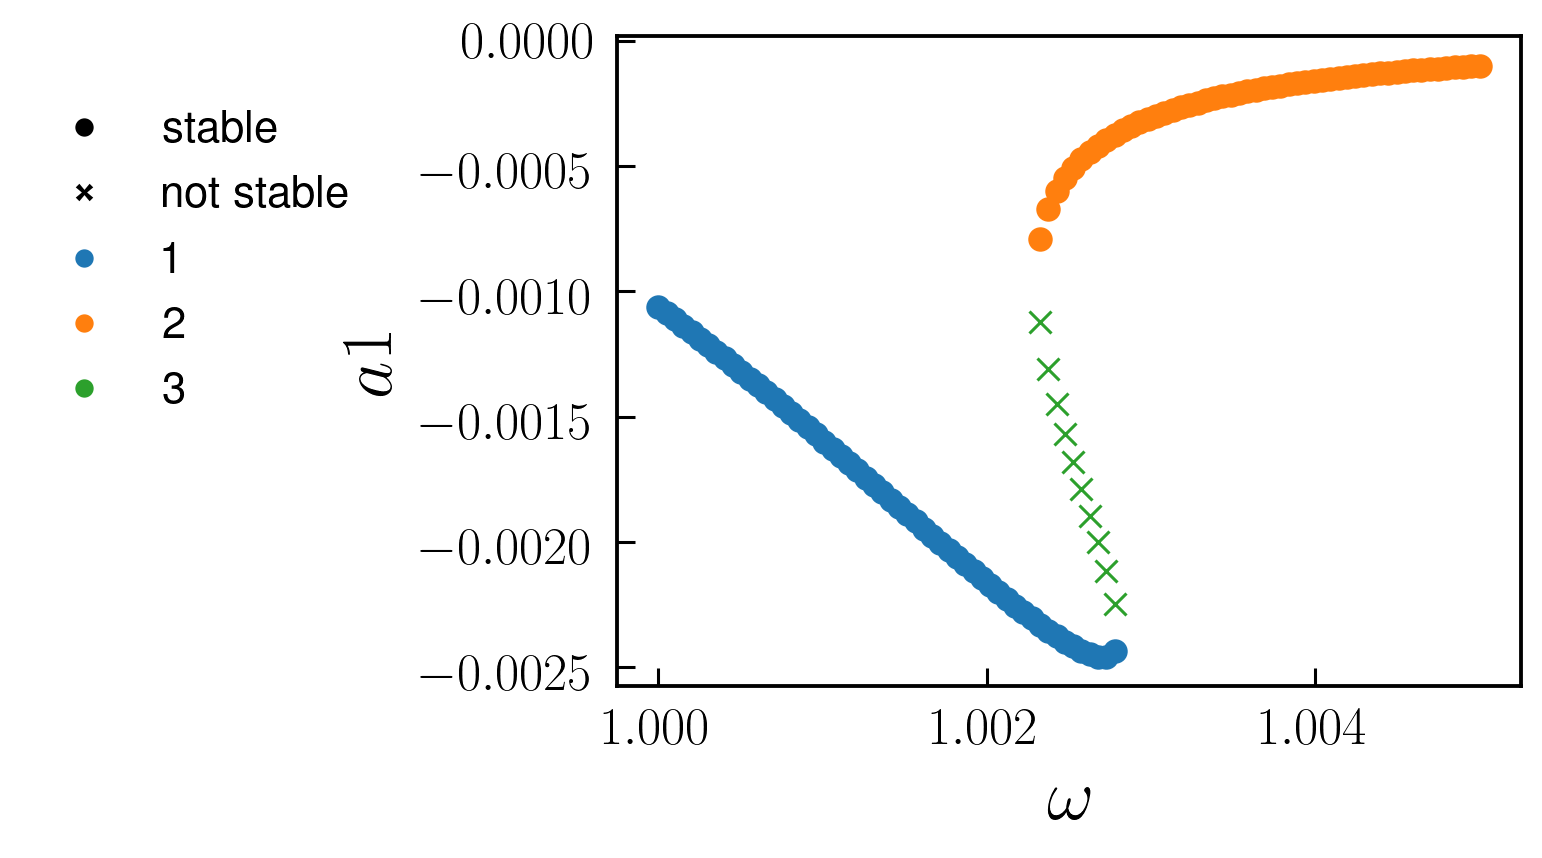

In [27]:
plot_1D_solutions(solutionsBeta, x="ω", y="a1");

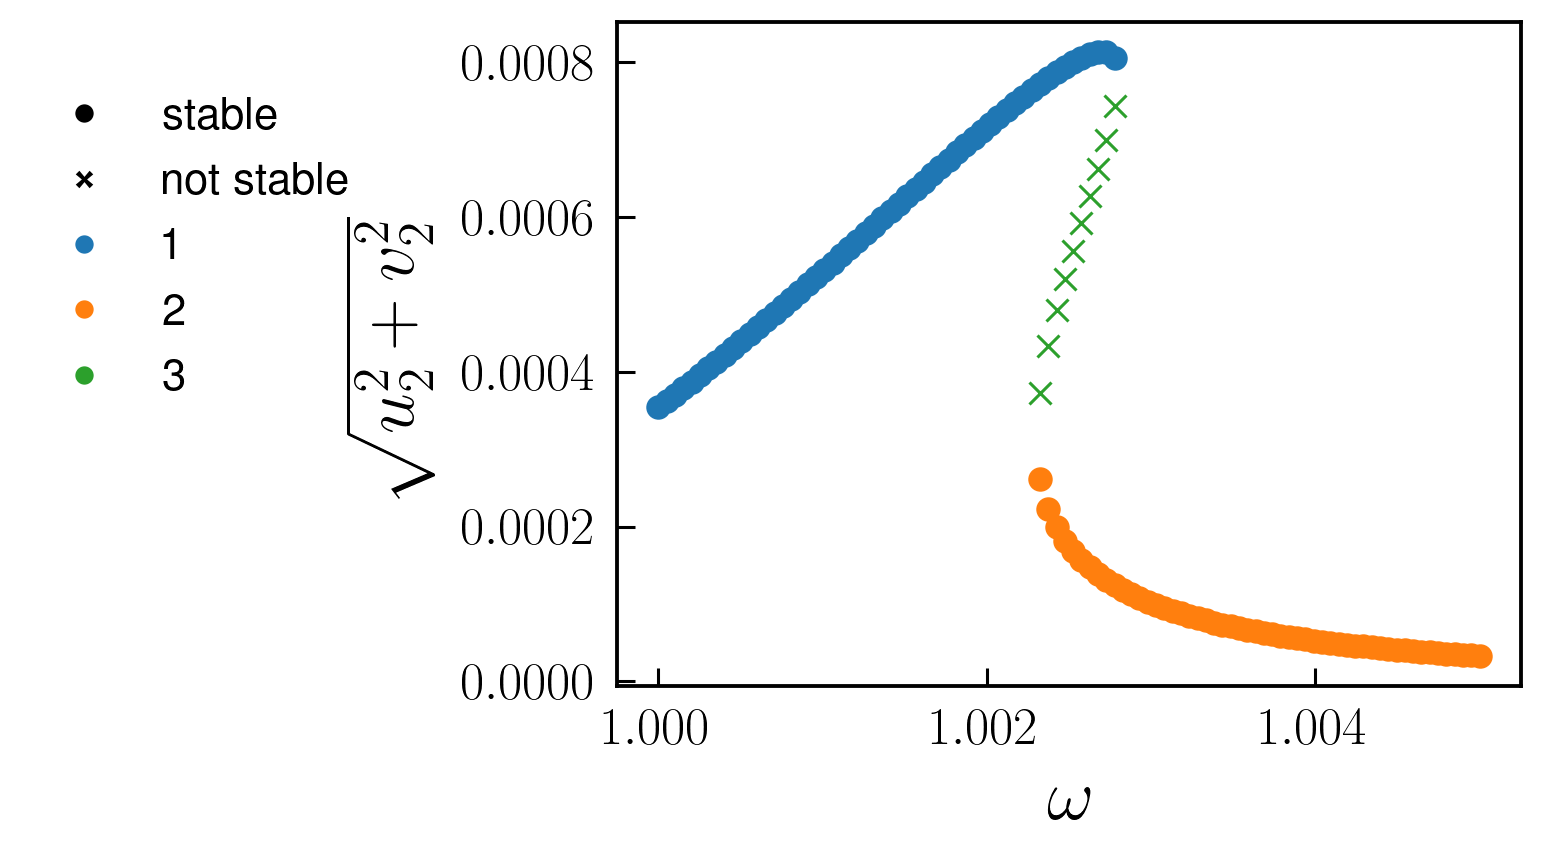

In [28]:
plot_1D_solutions(solutionsBeta, x="ω", y="sqrt(u2^2 + v2^2)");

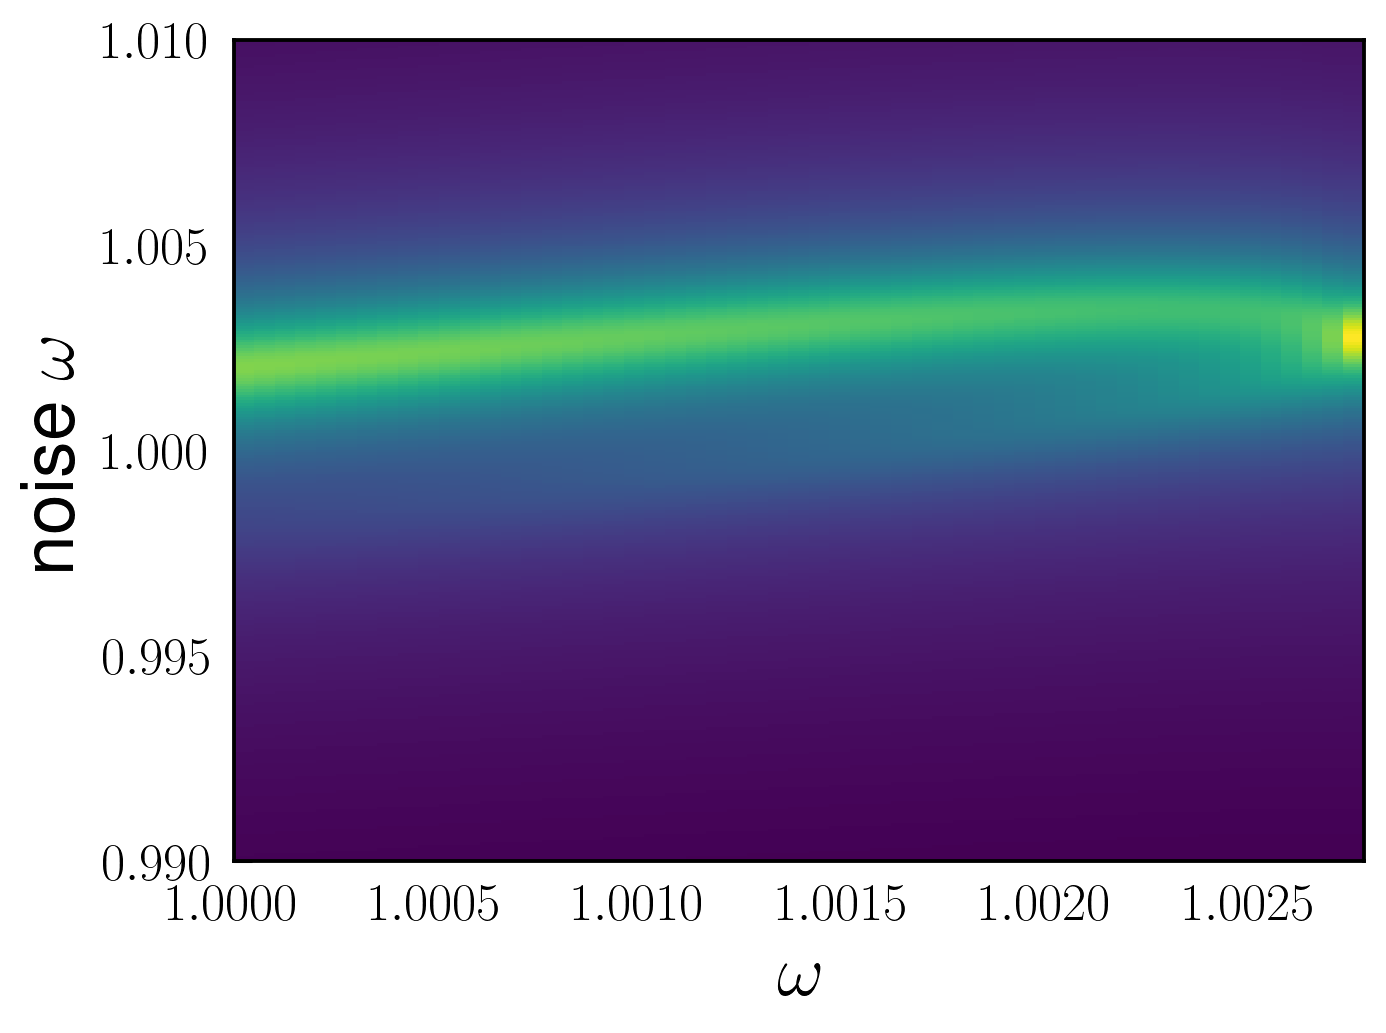

In [29]:
HarmonicBalance.LinearResponse.plot_jacobian_spectrum(solutionsBeta, x; Ω_range=LinRange(0.99, 1.01,300), branch=1, logscale=false);